# GRIP - The Sparks Foundation

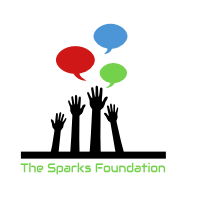

## Internship on Data Science and Business Analytics

### Author  :  Rohan Kumar Lala

# >>>>>>>>>>>Task - 4 : Exploratory Data Analysis - Terrorism<<<<<<<<<<<

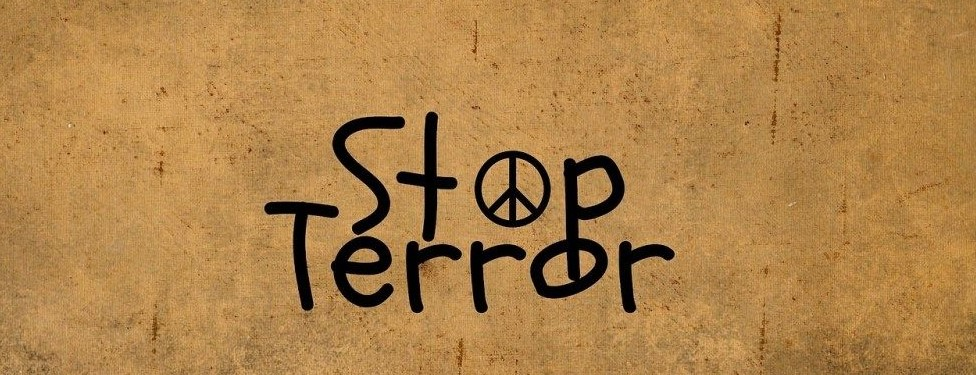

## Perform Exploratory Data Analysis on 'Global Terrorism'

_**Link for the dataset:**<br>&emsp; &emsp;&emsp; &emsp;&emsp;&emsp;_ 
https://bit.ly/2TK5Xn5 

### DATA PREPROCESSING

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
%matplotlib inline

**Importing Dataset**

In [ ]:
df=pd.read_csv(r'C:/Users/KIIT/Downloads/globalterrorismdb_0718dist.csv', encoding='iso-8859-1')

In [ ]:
df.head()

**Renaming columns**

In [ ]:
df.rename(columns={'eventid':'Event_ID','iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state'
                             ,'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                             'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type',
                             'motive':'Motive','success':'Success'},inplace=True)

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
df.head()

In [ ]:
df.describe()

In [ ]:
df.info()

**Since dataset has 135 columns, pick only the relevant columns.**


In [ ]:
terror_df = df[['Event_ID','Year','Month','Day','Country','Region','region','state','latitude','longitude','Success','AttackType','attacktype1'
               ,'Target_type','targtype1','Target','natlty1_txt','Killed','Wounded','Motive','city','Weapon_type','Group']]
terror_df

In [ ]:
terror_df.corr()

***The correlation coefficient is a statistical measure of the strength of the relationship between the relative movements of two variables. The values range between -1.0 and 1.0, with -1 indicating a perfect negative correlation, +1 indicating a perfect positive correlation, and 0 indicating no correlation at all. (A variable correlated with itself will always have a correlation coefficient of 1.)***

In [ ]:
terror_df.info()

### Main features of the Dataset:

In [ ]:
print("Region with the most attacks:",terror_df['Region'].value_counts().idxmax())

In [ ]:
print("Country with the most attacks:",terror_df['Country'].value_counts().index[0])

In [ ]:
print("City with the most attacks:",terror_df['city'].value_counts().index[1]) #as first value is unknown

In [ ]:
print("Year with the most attacks:",terror_df['Year'].value_counts().index[0])

In [ ]:
print("Month with the most attacks:",terror_df['Month'].value_counts().index[0])

This would mean the month of May.

In [ ]:
print("Most Attack Types:",terror_df['AttackType'].value_counts().index[0])

In [ ]:
print("Most Targeted Type:",terror_df['Target_type'].value_counts().index[0])

In [ ]:
print("Terror group with the most attacks is:",terror_df['Group'].value_counts().index[1])#as first value is unknown

### DATA VISUALIZATION

### Visualizing Terrorism data across the world (based on regions) through the years 1970-2017 

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data = terror_df, x='Region')
plt.xticks(size = 13,rotation=90)
plt.xlabel("REGION",size=15)
plt.ylabel("COUNT",size=15)
plt.show()

### From the above plot, we see that the region affected the most by terrorist activity is Middle East and North Africa.

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data = terror_df, x = 'Year',palette='Set1')
plt.xticks(rotation=90)
plt.xlabel("Year",size=20)
plt.ylabel("Count",size=20)
plt.show()

### We see, from the above visualization, that the year 2014 had the most terrorism related activities.

In [ ]:
plt.figure(figsize=(15,9))
x = terror_df['Country'].value_counts().index[:10]
y = terror_df['Country'].value_counts().values[:10]
sns.barplot(x,y,palette='Blues_d')
plt.title('Top 10 Countries Affected By Terrorism',size=20)
plt.xlabel('Countries',size=15)
plt.ylabel('Count',size=15)
plt.xticks(size=13,rotation= 90)
plt.show()

### We can see that Iraq is the most affected nation from terrorism.

In [ ]:
plt.figure(figsize=(15,9))
x = terror_df['city'].value_counts().index[1:10]
y = terror_df['city'].value_counts().values[1:10]
sns.barplot(x,y,palette='Blues_r')
plt.title('Top 10 Cities Affected By Terrorism',size=20)
plt.xlabel('Cities',size=15)
plt.ylabel('Count',size=15)
plt.xticks(size=13,rotation= 90)
plt.show()

### We can see that Baghdad is the most affected city from terrorism.

In [ ]:
terror_df_test=terror_df[['AttackType','Target_type','Success']]
terror_df_grp=terror_df_test.groupby(['AttackType','Target_type'],as_index=False).mean()
#terror_df_grp

In [ ]:
terror_df_pivot=terror_df_grp.pivot(index='AttackType',columns=('Target_type'),values='Success')
terror_df_pivot.fillna(0,inplace=True)
terror_df_pivot

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(terror_df_pivot,annot=True,cmap="PuBu")
plt.title("Success rate of Terrorist Attacks",size=20)
plt.xlabel('Target Type',size = 20)
plt.ylabel("Attack Type",size = 20)
plt.xticks(rotation=90)
plt.show()

###  This heatmap shows the success rate of terrorist attacks depending on the attack type and the target type. We can see that the Terrorrist attacks with almost 100% success rate are Hostage Taking(Barricade Incidents), while the worst affected target type are Private Citizens & their property.

In [ ]:
Iraq_Attack = terror_df[terror_df.Country == 'Iraq']
Iraq_Attack['Day'][Iraq_Attack.Day == 0] = 1
Iraq_Attack['Date'] = pd.to_datetime(Iraq_Attack[['Year','Month','Day']])
Iraq_Attack.drop(['Year','Month','Day'], axis = 1, inplace = True)
Iraq_Attack_Columns = Iraq_Attack.columns.tolist()
Iraq_Attack_Columns.insert(1, Iraq_Attack_Columns.pop(Iraq_Attack_Columns.index('Date')))
Iraq_Attack = Iraq_Attack.reindex(columns = Iraq_Attack_Columns)

In [ ]:
iraq_casualties_df= Iraq_Attack.groupby('AttackType')['AttackType'].count().reset_index(name = "Attack")
killed= np.asarray(Iraq_Attack.groupby('AttackType')['Killed'].count())
iraq_casualties_df['Killed'] = (killed/killed.sum()) *100; wounded= np.asarray(Iraq_Attack.groupby('AttackType')['Wounded'].count())
iraq_casualties_df['Wounded'] = (wounded/wounded.sum())*100; del iraq_casualties_df['Attack']
iraq_casualties_df #Percentage of killed and injured is calculated and displayed for the attack types

In [ ]:
colors = ('red','blue')
plt.figure(figsize=(15,9))
g = iraq_casualties_df.plot(kind='barh', color=colors, alpha=0.7, align = 'center')
g.set_yticklabels(iraq_casualties_df['AttackType'])
g.set_xlabel("Percentage of People killed and Injured in Iraq",size=15)
g.set_ylabel("Attack Types in Iraq",size=15)
g.set_title("People killed and injured in Iraq based on the attack type",size=15)
plt.show()

### It is observed that the number of people killed is mostly equal to the number of people wounded in the terrorist attacks in Iraq.

In [ ]:
terror_df['Wounded'] = terror_df['Wounded'].fillna(0).astype(int)
terror_df['Killed'] = terror_df['Killed'].fillna(0).astype(int)
terror_new_df = terror_df.copy()
terror_new_df['Casualties'] = terror_df['Killed'] + terror_df['Wounded']

In [ ]:
terror_new_df1 = terror_new_df.sort_values( by = 'Casualties', ascending=False)[:20]

In [ ]:
heat_object=terror_new_df1.pivot_table(index='Country',columns='Year',values='Casualties')
heat_object.fillna(0,inplace=True)
heat_object

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(heat_object,annot=True, cmap="cool")
plt.xlabel('Year',size = 20)
plt.ylabel("Countries",size = 20)
plt.title("Casualties Occured",size=20)
plt.show()

#### This Heatmap can be visualized for each country and year individually as well by selecting that particular country in the required year. It will display country, year and casualties in that particular terrorist activity when hovered over the required area.

## In our heatmap, United States has the highest casualty in the year 2001 which actually highlights the 9/11 World Trade Center attacks in New York killing thousands.

In [ ]:
weapon_df = terror_df.groupby(['Weapon_type'])['Event_ID'].count().reset_index().sort_values('Event_ID', ascending = False)
weapon_df.columns = ['WeaponType','Attacks']
weapon_df

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x='Attacks', y='WeaponType', data=weapon_df)
plt.title("Number of Terrorist Attacks per Weapon Type",size=25)
plt.xlabel('Number of Attacks',size = 25)
plt.ylabel("Weapon Type",size = 25)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

### Explosives and Firearms alone constitute the majority of attacks recorded in our dataset.

In [ ]:
terror_df['Group'].value_counts()[1:11]

In [ ]:
plt.figure(figsize=(13,7))
x = terror_df['Group'].value_counts().index[1:10]
y = terror_df['Group'].value_counts().values[1:10]
x = list(x)
x.reverse()
y = list(y)
y.reverse()
plt.barh(x,y,color=['green','black'])

### From the above plot, Taliban is clearly the most active Terror group.

# Geographical display of regions affected by terrorism:

In [ ]:
BBox = [-180,180,-90,90]

In [ ]:
black_region = terror_new_df.loc[(terror_new_df['Casualties']>10) ]
light_red_region = terror_new_df.loc[(terror_new_df['Casualties'] < 10) &(terror_new_df['Casualties'] > 0)]
yellow_region = terror_new_df.loc[terror_new_df['Casualties'] == 0]

In [ ]:
fig, ax = plt.subplots(figsize = (15,9))
ax.scatter(black_region.longitude,black_region.latitude, zorder=1, c='black', s=50)
ax.scatter(light_red_region.longitude,light_red_region.latitude, zorder=1, c='#ffcccb', s=10)
ax.scatter(yellow_region.longitude,yellow_region.latitude, zorder=1, c='yellow', s=2,)
ax.set_title("Regions With Terrorist attacks ",size = 20)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
plt.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.7)
labels = ["High casualty region","Low casualty region","No casualty region"]
plt.legend(labels, loc="lower center", facecolor="gray")
plt.show()

#  Terrorist attacks in a particular year with their locations:

In [ ]:
print("Year with the least attacks:",terror_df['Year'].value_counts().index[-1])

### 1971: Year with minimum terrorist attacks

#### Let's have a look at the terrorist attacks in the year 1971.

In [ ]:
filterYear = df['Year'] == 1971

In [ ]:
filterData = df[filterYear] # filter data
#filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
reqFilterData.info()

In [ ]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]], popup = folium.Popup(reqFilterDataList[point][0], parse_html=True)).add_to(markerCluster)
map

In [ ]:
print("Year with the most attacks:",terror_df['Year'].value_counts().index[0])

### 2014: Year with maximum terrorist attacks


#### Let's have a look at the terrorist attacks in the year 2014.

In [ ]:
filterYear = df['Year'] == 2014

In [ ]:
filterData = df[filterYear] # filter data
#filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
reqFilterData.info()

In [ ]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]], popup = folium.Popup(reqFilterDataList[point][0], parse_html=True)).add_to(markerCluster)
map

# Key Conclusions:

***1. Middle East and North Africa are the hot-zone of Terrorism.***


***2. As per our dataset, Terrorist activities occur the most in Iraq, Pakistan and Afghanistan. These countries need to make strong anti-terrorism policies.***


***3. Taliban and ISIL are the most active Terror groups as per our dataset.***


***4. Bombings/explosions and Firearms cause the majority of casualty. Terror fundings for such weapons through backdoors ought to be stopped.***


***5. 2014 is the year with the most terrorist attacks between 1970-2017 as per our dataset.***

***6. The Terrorrist attacks with almost 100% success rate are Hostage Taking (Barricade Incidents), while the worst affected target type are Private Citizens & their property.***

# Thank you for your time!

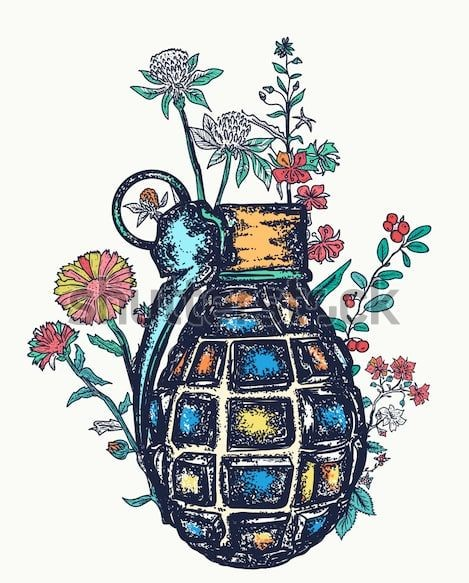